In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
import scipy.optimize

from scipy import ndimage as ndi
from skimage import feature
from skimage import io

In [2]:
im = io.imread('../15-seconds.png',as_gray=True)

In [3]:
im.shape

(768, 1366)

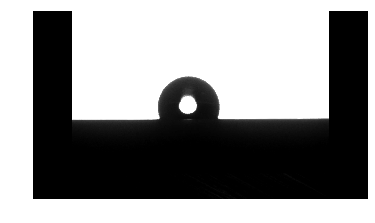

In [4]:
plt.imshow(im,cmap = 'gray',vmin = 0, vmax = 1)
plt.gca().axis('off');

In [6]:
%matplotlib qt
e1 = feature.canny(im,sigma = 0,low_threshold = 0.1, high_threshold = 0.5)

fig, ax = plt.subplots(2,1,gridspec_kw = {'height_ratios':[10,1]},figsize = (5,5))

ax[0].imshow(e1,cmap = 'gray_r',vmin = 0, vmax = 1)

import matplotlib.widgets

sigmaSlider = matplotlib.widgets.Slider(ax[1],r'$\sigma$',-3,3,valinit = 0,color = 'gray')

def update(val):
    e1 = feature.canny(im,sigma = np.power(10,val))
    ax[0].imshow(e1,cmap = 'gray_r',vmin = 0, vmax = 1)
    fig.canvas.draw_idle()
    
sigmaSlider.on_changed(update)


0

Traceback (most recent call last):
  File "C:\Users\Mike Orella\Miniconda3\envs\images\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\Mike Orella\Miniconda3\envs\images\lib\site-packages\matplotlib\widgets.py", line 417, in _update
    self.set_val(val)
  File "C:\Users\Mike Orella\Miniconda3\envs\images\lib\site-packages\matplotlib\widgets.py", line 438, in set_val
    func(val)
  File "<ipython-input-6-d3f05d136231>", line 13, in update
    e1 = feature.canny(im,sigma = np.power(10,val))
ValueError: Integers to negative integer powers are not allowed.


In [ ]:
ind = np.array([[i,j] for j,row in enumerate(e1) for i,x in enumerate(row) if x])
crop = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 800 and y >= 200 and y <= 600 )])

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(ind[:,0],ind[:,1])
plt.xlim([400,800])
plt.ylim([600,200])

In [ ]:
baseline_l = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 420 and y >= 200 and y <= 600 )])
baseline_r = np.array([[x,y] for x,y in ind if (x >= 780 and x <= 800 and y >= 200 and y <= 600 )])

In [ ]:
A = np.ones((baseline_l.shape[0] + baseline_r.shape[0],2))
A[:,1] = np.concatenate((baseline_l[:,0],baseline_r[:,0]))
c = np.concatenate((baseline_l[:,1],baseline_r[:,1]))
thet = np.linalg.lstsq(A,c)[0]
thet

In [ ]:
b,m = thet
plt.plot(crop[:,0],crop[:,1] - (m*crop[:,0]+b),'.')
plt.ylim([0,-400])

In [ ]:
circ_points = np.array([(x,y) for x,y in crop if y - (m*x + b)  <= -5])

In [ ]:
plt.plot(circ_points[:,0],circ_points[:,1],'.')

In [ ]:
def dist(param,points):
    *z , r = param
    ar = [(np.linalg.norm(np.array(z) - np.array(point)) - r)**2 for point in points]
    return np.sum(ar)

In [ ]:
res = sp.optimize.minimize(lambda x: dist(x,circ_points),np.concatenate((np.mean(circ_points, axis = 0),[200])))

In [ ]:
theta = np.linspace(0,2*np.pi,num = 100)

In [ ]:
*z, r = res['x']
x = z[0] + r * np.cos(theta)
y = z[1] + r * np.sin(theta)

In [ ]:
plt.figure(figsize = (3,3))
plt.plot(x,y,'r-')
plt.plot(circ_points[:,0],circ_points[:,1],'.')

In [ ]:
np.sqrt(res['fun'])

In [ ]:
circ_points.shape

In [ ]:
new_points = np.array([(x,y) for x,y in circ_points if (x - z[0])**2 + (y-z[1])**2 >= r**2])

In [ ]:
plt.figure(figsize = (3,3))
plt.plot(x,y,'r-')
plt.plot(new_points[:,0],new_points[:,1],'.')
plt.xlim([500,750])
plt.ylim([250,500])

In [ ]:
res = sp.optimize.minimize(lambda x: dist(x,new_points),np.concatenate((np.mean(new_points, axis = 0),[100])))
res

In [ ]:
*z, r = res['x']
x = z[0] + r * np.cos(theta)
y = z[1] + r * np.sin(theta)

In [ ]:
plt.figure(figsize = (3,3))
plt.plot(x,y,'r-')
plt.plot(new_points[:,0],new_points[:,1],'.')
plt.xlim([500,780])
plt.ylim([250,530])

In [ ]:
np.sqrt(res['fun'])

In [ ]:
x = new_points

In [ ]:
x[0:2,:]

In [ ]:
x[0,0] = 100
new_points[0:2,:]

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(im,cmap = 'gray',vmin = 0, vmax = 1)
plt.gca().axis('off');
plt.plot(x,y,'r-')

plt.plot([0,1366],[b,m*1366+b],'r-')
plt.xlim([500,780])
plt.ylim([530,250])

In [ ]:
im = io.imread('../45-seconds.png',as_gray=True)

In [ ]:
im.shape

In [ ]:
plt.imshow(im,cmap = 'gray',vmin = 0, vmax = 1)
plt.gca().axis('off');

In [ ]:
e1 = feature.canny(im,sigma = 0,low_threshold = 0.1, high_threshold = 0.5)
plt.figure(figsize=(10,10))
plt.imshow(e1,cmap = 'gray_r',vmin = 0, vmax = 1)
plt.gca().axis('off')

In [ ]:
ind = np.array([[i,j] for j,row in enumerate(e1) for i,x in enumerate(row) if x])
crop = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 1000 and y >= 500 and y <= 800 )])

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(ind[:,0],ind[:,1])
plt.xlim([400,1000])
plt.ylim([800,500])

In [ ]:
baseline_l = np.array([[x,y] for x,y in ind if (x >= 400 and x <= 420 and y >= 500 and y <= 800 )])
baseline_r = np.array([[x,y] for x,y in ind if (x >= 980 and x <= 1000 and y >= 500 and y <= 800 )])

In [ ]:
A = np.ones((baseline_l.shape[0] + baseline_r.shape[0],2))
A[:,1] = np.concatenate((baseline_l[:,0],baseline_r[:,0]))
c = np.concatenate((baseline_l[:,1],baseline_r[:,1]))
thet = np.linalg.lstsq(A,c)[0]
thet

In [ ]:
b,m = thet
plt.plot(crop[:,0],crop[:,1] - (m*crop[:,0]+b),'.')
plt.ylim([0,-50])

In [ ]:
circ_points = np.array([(x,y) for x,y in crop if y - (m*x + b)  <= -5])

In [ ]:
plt.plot(circ_points[:,0],circ_points[:,1],'.')

In [ ]:
res = sp.optimize.minimize(lambda x: dist(x,circ_points),np.concatenate((np.mean(circ_points, axis = 0),[200])))

In [ ]:
*z, r = res['x']
x = z[0] + r * np.cos(theta)
y = z[1] + r * np.sin(theta)

In [ ]:
plt.figure(figsize = (3,3))
plt.plot(x,y,'r-')
plt.plot(circ_points[:,0],circ_points[:,1],'.')

In [ ]:
plt.imshow(im,cmap = 'gray',vmin = 0, vmax = 1)
plt.gca().axis('off');
plt.plot(x,y,'r-')

plt.plot([0,1366],[b,m*1366+b],'r-')

In [ ]:
res = []
res[0] = 1
res[1] = 1

In [ ]:
print(res)

In [ ]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    print(val)
    print(samp.val)
    print(sfreq.val)
    
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()